In [4]:
import numpy as np
import tensorflow as tf

# Load SketchRNN data from.npz files
def load_data(npz_file):
    data = np.load(npz_file, allow_pickle=True, encoding='latin1')
    num_row = int(len(data['train']) * 0.01)
    return data['train'][:num_row]

# Load all the datasets
datasets = {
    'anjing': load_data('Dataset Fix/anjing.npz'),
    'apel': load_data('Dataset Fix/apel.npz'),
    'awan': load_data('Dataset Fix/awan.npz'),
    'bebek': load_data('Dataset Fix/bebek.npz'),
    'bintang': load_data('Dataset Fix/bintang.npz'),
    'bis': load_data('Dataset Fix/bis.npz'),
    'bola_basket': load_data('Dataset Fix/bola basket.npz'),
    'buku': load_data('Dataset Fix/buku.npz'),
    'bunga': load_data('Dataset Fix/bunga.npz'),
    'burung': load_data('Dataset Fix/burung.npz'),
    'daun': load_data('Dataset Fix/daun.npz'),
    'es_krim': load_data('Dataset Fix/es krim.npz'),
    'gunung': load_data('Dataset Fix/gunung.npz'),
    'hujan': load_data('Dataset Fix/hujan.npz'),
    'ikan': load_data('Dataset Fix/ikan.npz'),
    'kaktus': load_data('Dataset Fix/kaktus.npz'),
    'kalung': load_data('Dataset Fix/kalung.npz'),
    'kaos': load_data('Dataset Fix/kaos.npz'),
    'kelinci': load_data('Dataset Fix/kelinci.npz'),
    'koper': load_data('Dataset Fix/koper.npz'),
    'kue': load_data('Dataset Fix/kue.npz'),
    'kukis': load_data('Dataset Fix/kukis.npz'),
    'kupu_kupu': load_data('Dataset Fix/kupu-kupu.npz'),
    'lilin': load_data('Dataset Fix/lilin.npz'),
    'lolipop': load_data('Dataset Fix/lolipop.npz'),
    'lumba_lumba': load_data('Dataset Fix/lumba-lumba.npz'),
    'mata': load_data('Dataset Fix/mata.npz'),
    'matahari': load_data('Dataset Fix/matahari.npz'),
    'mobil': load_data('Dataset Fix/mobil.npz'),
    'pantai': load_data('Dataset Fix/pantai.npz'),
    'payung': load_data('Dataset Fix/payung.npz'),
    'pelangi': load_data('Dataset Fix/pelangi.npz'),
    'pesawat': load_data('Dataset Fix/pesawat.npz'),
    'pisang': load_data('Dataset Fix/pisang.npz'),
    'pohon': load_data('Dataset Fix/pohon.npz'),
    'rumah': load_data('Dataset Fix/rumah.npz'),
    'rumput': load_data('Dataset Fix/rumput.npz'),
    'semangka': load_data('Dataset Fix/semangka.npz'),
    'stroberi': load_data('Dataset Fix/stroberi.npz'),
    'sungai': load_data('Dataset Fix/sungai.npz'),
    'topi': load_data('Dataset Fix/topi.npz'),
    'vas': load_data('Dataset Fix/vas.npz'),
    'wajah': load_data('Dataset Fix/wajah.npz')
}

# Assign class indices
class_names = list(datasets.keys())
class_indices = {name: index for index, name in enumerate(class_names)}

# Combine all datasets into a single numpy array with labels
combined_data = []
combined_labels = []

for class_name, data in datasets.items():
    combined_data.extend(data)
    combined_labels.extend([class_indices[class_name]] * len(data))

# Pad the sketch data to have the same length
max_length = max(len(sketch) for sketch in combined_data)
padded_data = []
for sketch in combined_data:
    padded_sketch = np.pad(sketch, ((0, max_length - len(sketch)), (0, 0)))
    padded_data.append(padded_sketch)

combined_data = np.array(padded_data, dtype=np.float32)
combined_labels = np.array(combined_labels, dtype=np.int64)

# Create TensorFlow datasets
def create_dataset(data, labels):
    return tf.data.Dataset.from_tensor_slices((data, labels))

full_dataset = create_dataset(combined_data, combined_labels)

# Shuffle and split the dataset into train, validation, and test sets
def split_dataset(dataset, train_size=0.8, val_size=0.1, test_size=0.1, shuffle=True):
    dataset_size = len(dataset)
    if shuffle:
        dataset = dataset.shuffle(buffer_size=dataset_size)

    train_size = int(train_size * dataset_size)
    val_size = int(val_size * dataset_size)

    train_dataset = dataset.take(train_size)
    val_test_dataset = dataset.skip(train_size)
    val_dataset = val_test_dataset.take(val_size)
    test_dataset = val_test_dataset.skip(val_size)

    return train_dataset, val_dataset, test_dataset

train_set, valid_set, test_set = split_dataset(full_dataset)

# Define the quickdraw_dataset function
def quickdraw_dataset(dataset, batch_size=32, shuffle_buffer_size=None, cache=False):
    if cache:
        dataset = dataset.cache()
    if shuffle_buffer_size:
        dataset = dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

# Create batched datasets
train_set = quickdraw_dataset(train_set, shuffle_buffer_size=10000)
valid_set = quickdraw_dataset(valid_set)
test_set = quickdraw_dataset(test_set)

# Example usage
for sketches, labels in train_set.take(1):
    print("sketches =", sketches)
    print("labels =", labels)


sketches = tf.Tensor(
[[[-27.  11.   0.]
  [-33.   8.   0.]
  [-71.   6.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[-22.   2.   0.]
  [-16.  11.   0.]
  [ -5.  15.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[ 52. -51.   0.]
  [ 24. -15.   0.]
  [ 11.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 ...

 [[  7. -22.   0.]
  [  7.  -9.   1.]
  [ 44.  -6.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[186.  31.   0.]
  [ 68.   6.   0.]
  [  6.   1.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[ -9.  -3.   0.]
  [ -9.   2.   0.]
  [-41.  19.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]], shape=(32, 176, 3), dtype=float32)
labels = tf.Tensor(
[ 4  3 29 33  9  9 40 24 39 25  7  2 17  9 42 27  7 37 14 12 12 12 33 27
 40  8 23 28  5 36  7 21], shape=(32,), dtype=int64)


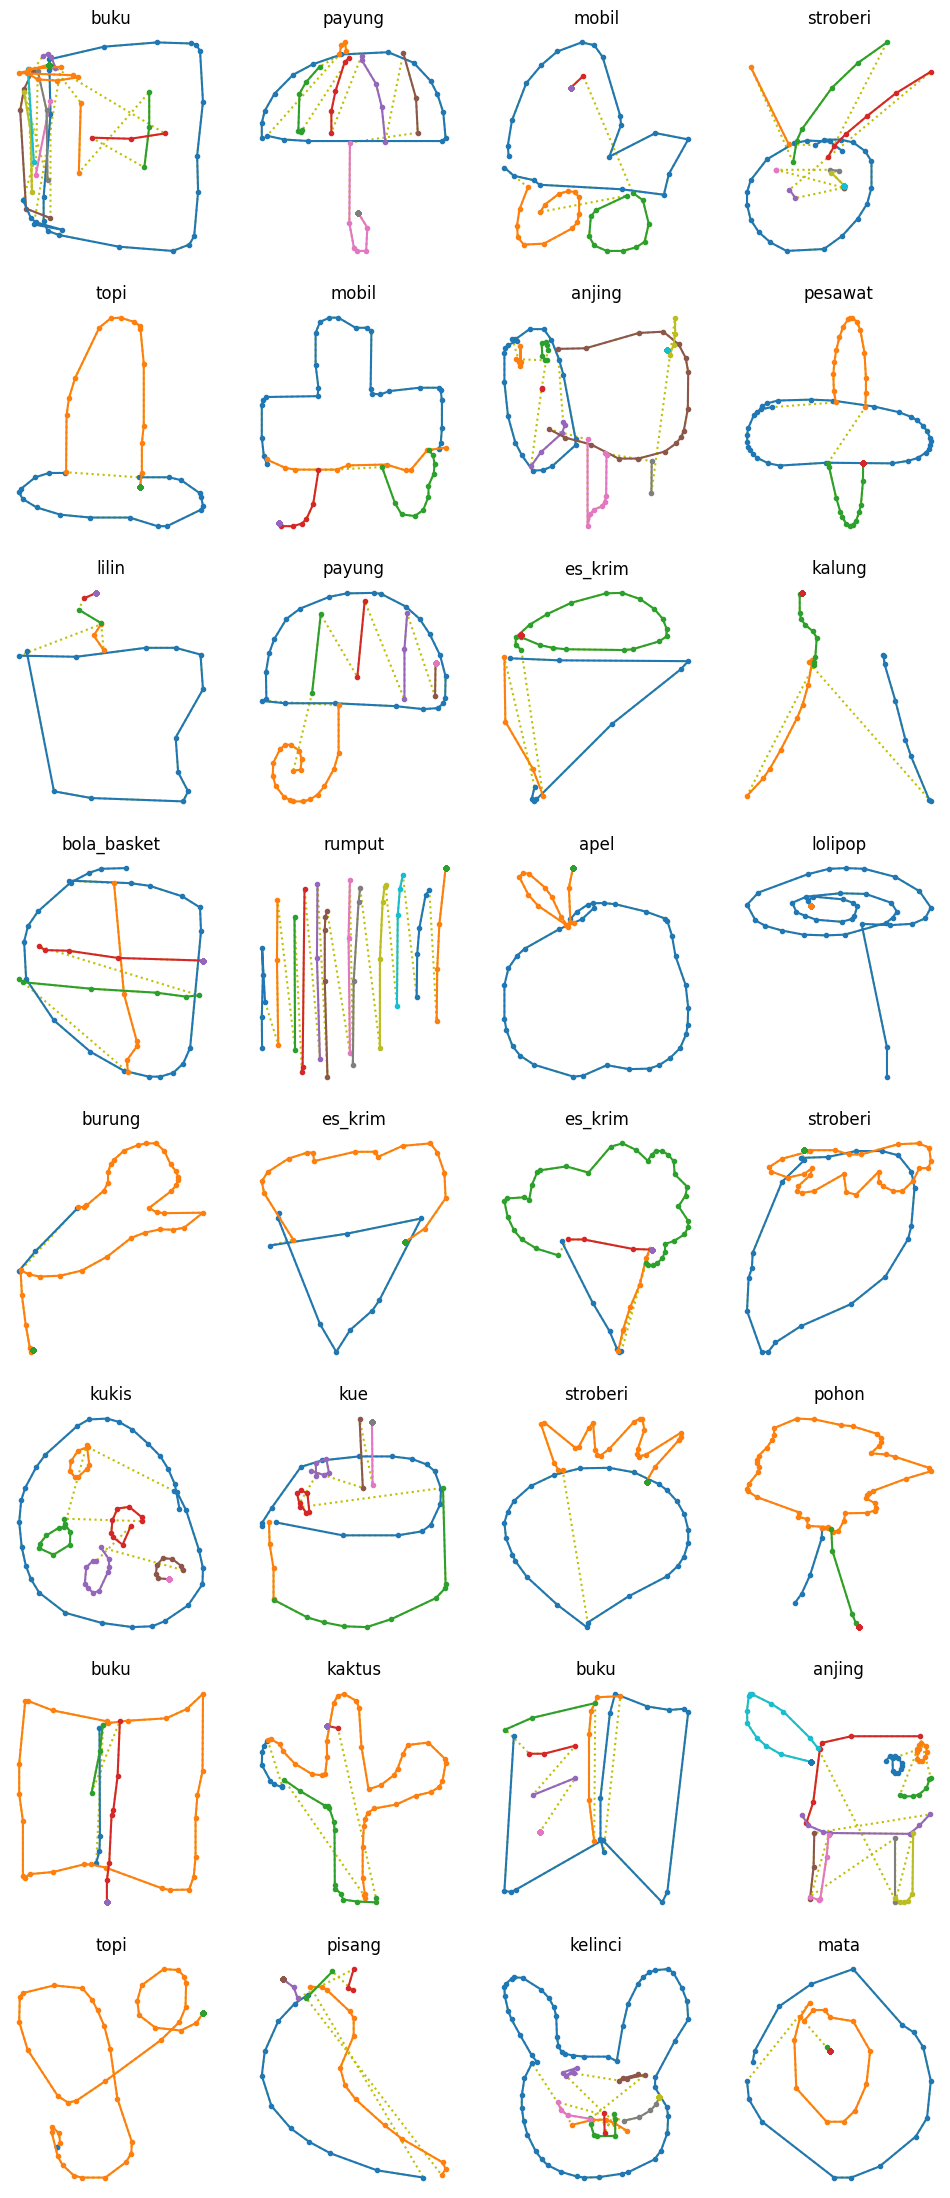

In [10]:
def draw_sketch(sketch, label=None):
    origin = np.array([[0., 0., 0.]])
    sketch = np.concatenate([origin, sketch], axis=0) 
    stroke_end_indices = np.argwhere(sketch[:, -1] == 1.)[:, 0]
    coordinates = np.cumsum(sketch[:, :2], axis=0)
    strokes = np.split(coordinates, stroke_end_indices + 1)
    title = class_names[label] if label is not None else "Try to guess"  
    plt.title(title)
    plt.plot(coordinates[:, 0], -coordinates[:, 1], "y:")
    for stroke in strokes:
        plt.plot(stroke[:, 0], -stroke[:, 1], ".-")
    plt.axis("off")

def draw_sketches(sketches, labels):
    n_sketches = len(sketches)
    n_cols = 4
    n_rows = (n_sketches - 1) // n_cols + 1
    plt.figure(figsize=(n_cols * 3, n_rows * 3.5))
    for index, (sketch, label) in enumerate(zip(sketches, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        draw_sketch(sketch, label)
    plt.show()

for sketches, labels in train_set.take(1):
    draw_sketches(sketches.numpy(), labels.numpy())


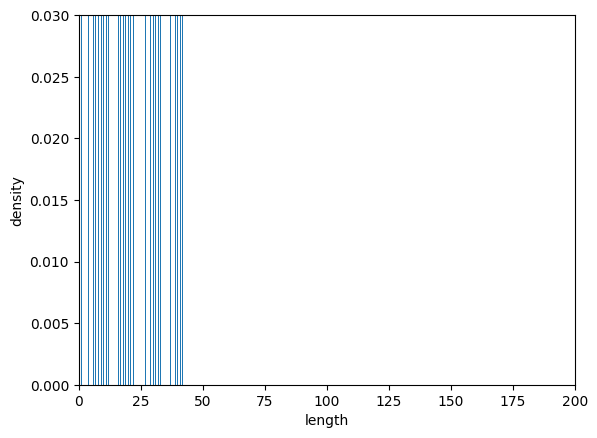

In [12]:
lengths = np.concatenate([lengths for sketches, lengths in train_set.take(1000)])
plt.hist(lengths, bins=150, density=True)
plt.axis([0, 200, 0, 0.03])
plt.xlabel("length")
plt.ylabel("density")
plt.show()


In [14]:
def crop_long_sketches(dataset, max_length=100):
    return dataset.map(lambda inks, lengths: (inks[:, :max_length], lengths))

cropped_train_set = crop_long_sketches(train_set)
cropped_valid_set = crop_long_sketches(valid_set)
cropped_test_set = crop_long_sketches(test_set)


In [17]:
from tensorflow import keras
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, Bidirectional, LSTM, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model_1 = Sequential([
    Conv1D(32, kernel_size=5, strides=2, activation="relu", input_shape=(100, 3)),
    BatchNormalization(),
    Conv1D(64, kernel_size=5, strides=2, activation="relu"),
    BatchNormalization(),
    Conv1D(128, kernel_size=3, strides=2, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Bidirectional(LSTM(256, return_sequences=True)),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(len(class_names), activation="softmax")
])


optimizer = keras.optimizers.Adam(learning_rate=1e-3, clipnorm=1.0)

model_1.compile(loss="sparse_categorical_crossentropy",
                optimizer=optimizer,
                metrics=["accuracy", "sparse_top_k_categorical_accuracy"])

early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True, monitor='val_accuracy')
model_checkpoint_cb = ModelCheckpoint("best_model.keras", save_best_only=True, monitor='val_accuracy')

history_1 = model_1.fit(cropped_train_set, epochs=8,
                        validation_data=cropped_valid_set,
                        callbacks=[early_stopping_cb, model_checkpoint_cb])

# Print model summary
model_1.summary()


Epoch 1/8
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 121s 78ms/step - accuracy: 0.2005 - loss: 2.9466 - sparse_top_k_categorical_accuracy: 0.5095 - val_accuracy: 0.5364 - val_loss: 1.6048 - val_sparse_top_k_categorical_accuracy: 0.8559
Epoch 2/8
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 102s 78ms/step - accuracy: 0.4925 - loss: 1.7662 - sparse_top_k_categorical_accuracy: 0.8321 - val_accuracy: 0.6642 - val_loss: 1.1390 - val_sparse_top_k_categorical_accuracy: 0.9190
Epoch 3/8
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 137s 104ms/step - accuracy: 0.6072 - loss: 1.3805 - sparse_top_k_categorical_accuracy: 0.8868 - val_accuracy: 0.7230 - val_loss: 0.9325 - val_sparse_top_k_categorical_accuracy: 0.9435
Epoch 4/8
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 113s 86ms/step - accuracy: 0.6477 - loss: 1.2241 - sparse_top_k_categorical_accuracy: 0.9066 - val_accuracy: 0.7747 - val_loss: 0.7435 - val_sparse_top_k_categorical_accuracy: 0.9570
Epoch 5/8
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 153s 116ms/step - accuracy: 0.6905 - loss: 1.0856 - sparse_top

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 48, 32)         │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 48, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 22, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 22, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 10, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 10, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ (None, 10, 512)        │       788,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 10, 256)        │       656,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 10, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,952,643 (18.89 MB)

 Trainable params: 1,650,731 (6.30 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 3,301,464 (12.59 MB)

In [18]:
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model = keras.models.Sequential([
    keras.layers.Conv1D(32, kernel_size=5, strides=2, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv1D(64, kernel_size=5, strides=2, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv1D(128, kernel_size=3, strides=2, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(128),
    keras.layers.Dense(len(class_names), activation="softmax")
])

optimizer = keras.optimizers.SGD(learning_rate=1e-2, clipnorm=1.)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy", "sparse_top_k_categorical_accuracy"])

early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True, monitor='val_accuracy')

history = model.fit(cropped_train_set, epochs=10,
                    validation_data=cropped_valid_set,
                    callbacks=[early_stopping_cb])

Epoch 1/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 55s 36ms/step - accuracy: 0.0730 - loss: 3.6103 - sparse_top_k_categorical_accuracy: 0.2534 - val_accuracy: 0.1076 - val_loss: 3.3054 - val_sparse_top_k_categorical_accuracy: 0.3841
Epoch 2/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 60s 45ms/step - accuracy: 0.1177 - loss: 3.2559 - sparse_top_k_categorical_accuracy: 0.3964 - val_accuracy: 0.1708 - val_loss: 3.0678 - val_sparse_top_k_categorical_accuracy: 0.5005
Epoch 3/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - accuracy: 0.1838 - loss: 2.9947 - sparse_top_k_categorical_accuracy: 0.5154 - val_accuracy: 0.2584 - val_loss: 2.7037 - val_sparse_top_k_categorical_accuracy: 0.6189
Epoch 4/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 32s 24ms/step - accuracy: 0.2695 - loss: 2.6494 - sparse_top_k_categorical_accuracy: 0.6334 - val_accuracy: 0.3396 - val_loss: 2.3621 - val_sparse_top_k_categorical_accuracy: 0.7087
Epoch 5/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - accuracy: 0.3471 - loss: 2.3425 - sparse_top_k

In [19]:
def sketches_transform(sketches):
  resized_sketches = []
  for sketch in sketches:
    resized_sketch = tf.image.resize(tf.expand_dims(sketch, axis=-1), size=(100, 3))
    resized_sketches.append(resized_sketch)
  tensor_of_sketches = tf.stack(resized_sketches)
  tensor_of_sketches = tf.reshape(tensor_of_sketches, (-1, 100, 3))
  return tensor_of_sketches
t_sketches = sketches_transform(sketches)

In [20]:
sketches.shape

TensorShape([32, 176, 3])

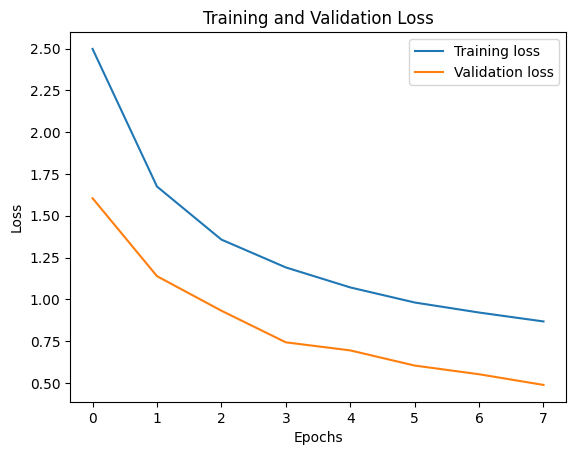

In [21]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()

plot_loss(history_1)

In [23]:
y_test = np.concatenate([labels for _, labels in test_set])
y_probas = model_1.predict(test_set)


165/165 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step


In [24]:
np.mean(keras.metrics.sparse_top_k_categorical_accuracy(y_test, y_probas))

0.12012925

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


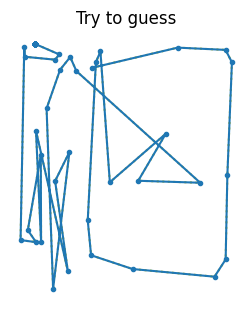

Top-5 predictions:
  1. stroberi 43.963%
  2. semangka 18.094%
  3. daun 8.231%
  4. buku 5.589%
  5. bola_basket 4.659%
Answer: buku


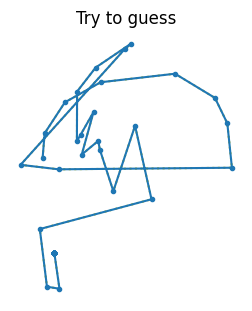

Top-5 predictions:
  1. payung 94.615%
  2. es_krim 1.288%
  3. lolipop 0.595%
  4. topi 0.573%
  5. burung 0.469%
Answer: payung


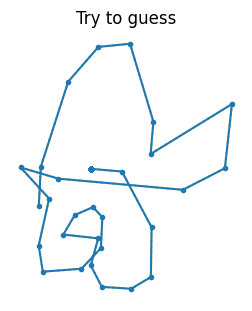

Top-5 predictions:
  1. mata 47.405%
  2. mobil 33.609%
  3. topi 3.731%
  4. burung 2.013%
  5. ikan 1.576%
Answer: mobil


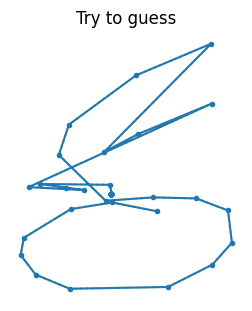

Top-5 predictions:
  1. apel 50.984%
  2. pisang 13.124%
  3. vas 8.012%
  4. topi 4.332%
  5. stroberi 4.011%
Answer: stroberi


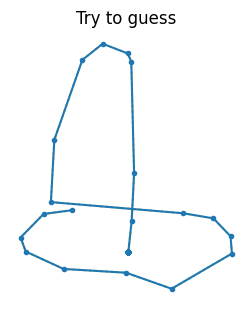

Top-5 predictions:
  1. topi 99.879%
  2. rumah 0.016%
  3. pisang 0.015%
  4. gunung 0.012%
  5. burung 0.011%
Answer: topi


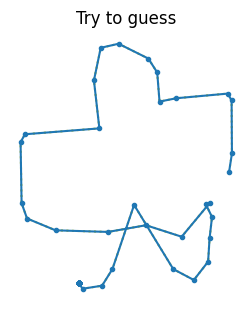

Top-5 predictions:
  1. lumba_lumba 73.843%
  2. burung 10.542%
  3. bebek 3.570%
  4. pesawat 2.456%
  5. sungai 2.137%
Answer: mobil


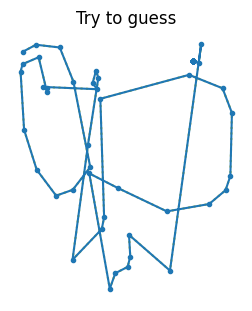

Top-5 predictions:
  1. buku 24.574%
  2. anjing 20.520%
  3. kaos 14.501%
  4. pesawat 7.835%
  5. burung 5.768%
Answer: anjing


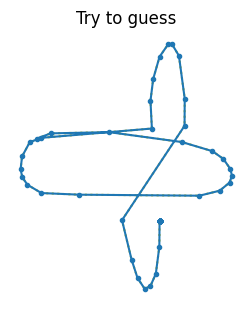

Top-5 predictions:
  1. pesawat 98.439%
  2. topi 0.531%
  3. bintang 0.428%
  4. lumba_lumba 0.244%
  5. burung 0.073%
Answer: pesawat


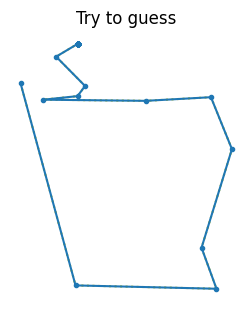

Top-5 predictions:
  1. pisang 23.462%
  2. gunung 19.029%
  3. lilin 13.540%
  4. lolipop 8.811%
  5. koper 7.711%
Answer: lilin


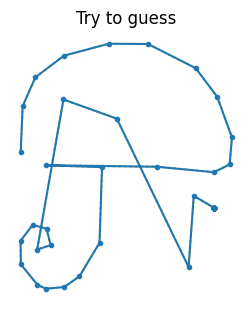

Top-5 predictions:
  1. ikan 34.214%
  2. daun 12.695%
  3. payung 12.148%
  4. lumba_lumba 9.647%
  5. rumah 6.556%
Answer: payung


In [26]:
n_new = 10
Y_probas = model_1.predict(t_sketches)
top_k = tf.nn.top_k(Y_probas, k=5)
for index in range(n_new):
    plt.figure(figsize=(3, 3.5))
    draw_sketch(t_sketches[index])
    plt.show()
    print("Top-5 predictions:".format(index + 1))
    for k in range(5):
        class_name = class_names[top_k.indices[index, k]]
        proba = 100 * top_k.values[index, k]
        print("  {}. {} {:.3f}%".format(k + 1, class_name, proba))
    print("Answer: {}".format(class_names[labels[index].numpy()]))

In [ ]:
weights_file = "sketch_rnn_weights_1.h5" 
model_1.save_weights(weights_file)